# Assignment 9: GBDT

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/9_Donors_choose_DT

/content/drive/My Drive/9_Donors_choose_DT


#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

In [4]:
 
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
# import nltk
# nltk.download('vader_lexicon')
 
sid = SentimentIntensityAnalyzer()
 
for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)
 
for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')
 
# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [6]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import numpy as np
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [8]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
 
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# train test split
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=1)

In [9]:
def code_train(name):
    d=dict()
    p=0
    n=0
    t=0
    l=X_train[name].unique()
    f=[]
    for j in range(len(l)):
        for i in range(X_train.shape[0]):
            if X_train[name].values[i]==l[j] and y_train[i]==1:
               p+=1
            if X_train[name].values[i]==l[j] and y_train[i]==0:
               n+=1
        t=n+p
        d[l[j]]=[n/t,p/t]
        p=n=t=0
    
 
    for i in range(X_train.shape[0]):
        f.append(d[X_train[name].values[i]])
    return np.array(f),l,d

In [10]:
new_school_state,l_sc,d_sc=code_train('school_state')
new_teacher_prefix,l_t,d_t=code_train('teacher_prefix')
new_project_grade_category,l_p,d_p=code_train('project_grade_category')
new_clean_categories,l_c,d_c=code_train('clean_categories')
new_clean_subcategories,l_cs,d_cs=code_train('clean_subcategories')

In [11]:
 
def code_test(name,l,d):
    f=[]
    
    
 
    for i in range(X_test.shape[0]):
        if X_test[name].values[i] in l:
           f.append(d[X_test[name].values[i]])
        else:
           f.append([0.5,0.5])
    return np.array(f)

In [12]:
 
new_school_state_test=code_test('school_state',l_sc,d_sc)
new_teacher_prefix_test=code_test('teacher_prefix',l_t,d_t)
new_project_grade_category_test=code_test('project_grade_category',l_p,d_p)
new_clean_categories_test=code_test('clean_categories',l_c,d_c)
new_clean_subcategories_test=code_test('clean_subcategories',l_cs,d_cs)

In [13]:
 
 
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))
 
 
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

In [14]:
 
 
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
 
X_train_teacher_number_of_previously_posted_projects_norm= normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
 
X_train_teacher_number_of_previously_posted_projects_norm=X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
 
X_test_teacher_number_of_previously_posted_projects_norm=X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
#print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [15]:
 import pickle
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [16]:
 
 
 
 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=8000)
vectorizer.fit(X_train['essay'].values)
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf_ra= vectorizer.transform(X_train['essay'].values)
#X_cv_essay_tfidf= vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf_ra = vectorizer.transform(X_test['essay'].values)
 
print(X_train_essay_tfidf_ra.shape)

(73196, 8000)


In [17]:

 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sent_score_train=[]
sent_score_test=[]
temp_l=[]
temp_l1=[]
for i in X_train['essay'].values:
    temp_l=sid.polarity_scores(i).values()
    sent_score_train.append(list(temp_l))
 
for i in X_test['essay'].values:
    temp_l1=sid.polarity_scores(i).values()
    sent_score_test.append(list(temp_l1))
print(len(sent_score_train))

73196


In [18]:
 
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [19]:
 
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr.append(vector)
 
print(len(tfidf_w2v_vectors_tr))
print(len(tfidf_w2v_vectors_tr[0]))

73196
300


In [20]:
 
 
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in (X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te.append(vector)
 
print(len(tfidf_w2v_vectors_te))
print(len(tfidf_w2v_vectors_te[0]))

36052
300


In [21]:
 
sent_score_train_np=np.array(sent_score_train)
sent_score_test_np=np.array(sent_score_test)
print(sent_score_train_np.shape)
print(sent_score_train_np[0])

(73196, 4)
[0.062  0.618  0.32   0.9914]


In [22]:
 
tfidf_w2v_vectors_te_np=np.array(tfidf_w2v_vectors_te)
tfidf_w2v_vectors_tr_np=np.array(tfidf_w2v_vectors_tr)
print(tfidf_w2v_vectors_te_np.shape)
print(tfidf_w2v_vectors_tr_np.shape)

(36052, 300)
(73196, 300)


In [23]:
 
 
 
 
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_= np.hstack((new_school_state, new_teacher_prefix, new_project_grade_category,new_clean_categories, new_clean_subcategories,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,tfidf_w2v_vectors_tr_np))
X_te_= np.hstack((new_school_state_test, new_teacher_prefix_test, new_project_grade_category_test,new_clean_categories_test, new_clean_subcategories_test,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,tfidf_w2v_vectors_te_np))
 
print("Final Data matrix")
print(X_tr_.shape, y_train.shape)
 
print(X_te_.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 312) (73196,)
(36052, 312) (36052,)


In [24]:
 
 
 
 
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_ra = hstack((new_school_state, new_teacher_prefix, new_project_grade_category,new_clean_categories, new_clean_subcategories,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,X_train_essay_tfidf_ra,sent_score_train_np)).tocsr()
X_te_ra=hstack((new_school_state_test, new_teacher_prefix_test, new_project_grade_category_test,new_clean_categories_test, new_clean_subcategories_test,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,X_test_essay_tfidf_ra,sent_score_test_np)).tocsr()
 
print("Final Data matrix")
print(X_tr_ra.shape, y_train.shape)
 
print(X_te_ra.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 8016) (73196,)
(36052, 8016) (36052,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

In [25]:
 
%%time
from xgboost import XGBClassifier
 
 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
 
dtree = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
parameters = {'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] ,'n_estimators':[5, 10,50,75,100]}
clf = RandomizedSearchCV(dtree, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_tr_ra, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 13.1 s, sys: 13.9 s, total: 27 s
Wall time: 7min 32s


In [26]:
import pandas as pd
results = pd.DataFrame.from_dict(clf.cv_results_)
 
 
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,25.557605,0.823871,1.979051,0.053493,50,0.2,"{'n_estimators': 50, 'learning_rate': 0.2}",0.715105,0.707417,0.715809,0.712777,0.003801,3,0.759185,0.760407,0.756555,0.758716,0.001607
1,20.616565,1.816967,1.929717,0.038062,10,0.0001,"{'n_estimators': 10, 'learning_rate': 0.0001}",0.611661,0.600135,0.606848,0.606214,0.004727,9,0.619981,0.616675,0.611147,0.615934,0.003644
2,25.013358,0.733841,2.007719,0.056965,75,0.1,"{'n_estimators': 75, 'learning_rate': 0.1}",0.712033,0.704098,0.710675,0.708935,0.003465,4,0.746483,0.748172,0.747154,0.747269,0.000694
3,21.534328,1.055336,1.896257,0.034025,50,0.3,"{'n_estimators': 50, 'learning_rate': 0.3}",0.719970,0.712121,0.718541,0.716877,0.003413,2,0.774597,0.777160,0.771793,0.774517,0.002192
4,23.555114,0.400442,1.974423,0.060700,75,0.01,"{'n_estimators': 75, 'learning_rate': 0.01}",0.644815,0.639654,0.654619,0.646363,0.006207,5,0.658138,0.662459,0.665034,0.661877,0.002845


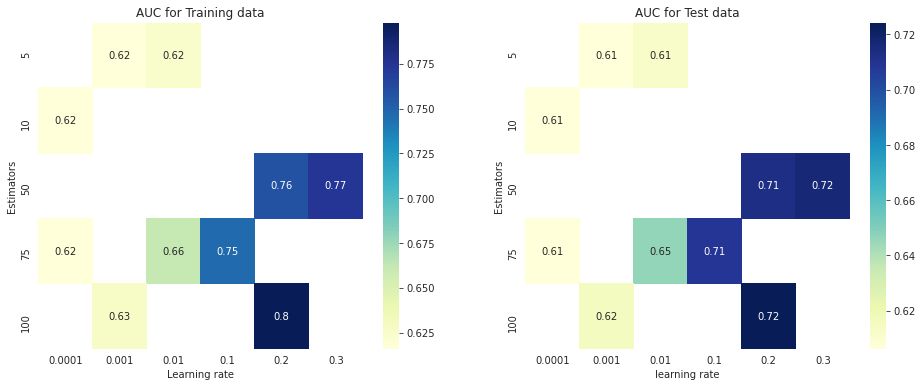

In [28]:
#Took this code from https://www.kaggle.com/arindambanerjee/grid-search-simplified
import seaborn as sns
import matplotlib.pyplot as plt

learning_rate_list = list(clf.cv_results_['param_learning_rate'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Learning rate':learning_rate_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Learning rate', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'learning rate':learning_rate_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='learning rate', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()

In [29]:
clf.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [30]:
dtree_final= XGBClassifier(n_jobs=-1,learning_rate=0.3,n_estimators=50,tree_method='gpu_hist', gpu_id=0)
dtree_final.fit(X_tr_ra, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [31]:
 
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
 
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [32]:
import matplotlib.pyplot as plt


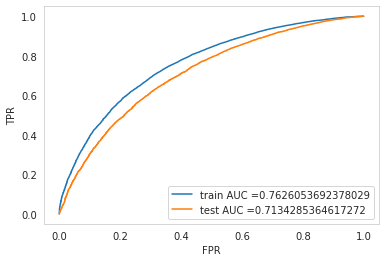

In [33]:
from sklearn.metrics import roc_curve, auc
y_train_pred = dtree_final.predict_proba(X_tr_ra)[:,1]
y_test_pred = dtree_final.predict_proba(X_te_ra)[:,1]
 
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()
a=auc(test_fpr,test_tpr)

the maximum value of tpr*(1-fpr) 0.48449559757025523 for threshold 0.838
Train confusion matrix


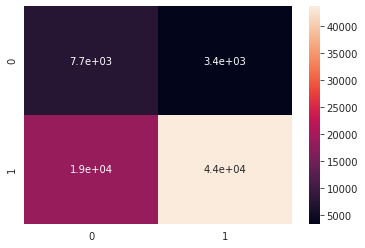

In [34]:
 
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")

sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)),annot=True)

Test confusion matrix


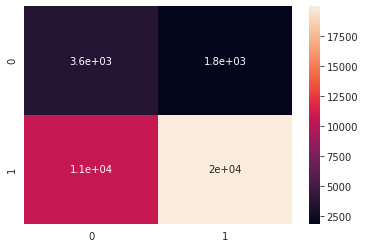

In [35]:
 
print("Test confusion matrix")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)),annot=True)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [36]:
 
%%time
from xgboost import XGBClassifier
 
 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
 
dtree = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
parameters = {'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] ,'n_estimators':[5, 10,50,75,100]}
clf = RandomizedSearchCV(dtree, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_tr_, y_train)

CPU times: user 3.24 s, sys: 2.51 s, total: 5.75 s
Wall time: 1min 14s


In [37]:
import pandas as pd
results = pd.DataFrame.from_dict(clf.cv_results_)
 
 
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.807911,0.295590,0.126292,0.014376,5,0.1,"{'n_estimators': 5, 'learning_rate': 0.1}",0.647233,0.642363,0.660868,0.650155,0.007832,5,0.664299,0.670994,0.671549,0.668947,0.003295
1,1.475820,0.135400,0.133450,0.011994,10,0.0001,"{'n_estimators': 10, 'learning_rate': 0.0001}",0.606897,0.602659,0.624923,0.611493,0.009653,9,0.623389,0.622253,0.626586,0.624076,0.001834
2,7.574486,0.420583,0.174255,0.017043,75,0.01,"{'n_estimators': 75, 'learning_rate': 0.01}",0.658171,0.653493,0.672658,0.661440,0.008159,3,0.676765,0.683627,0.681782,0.680725,0.002900
3,5.406503,0.372415,0.139446,0.002164,50,0.3,"{'n_estimators': 50, 'learning_rate': 0.3}",0.710408,0.698505,0.710275,0.706396,0.005580,2,0.767165,0.770134,0.767095,0.768131,0.001416
4,5.478174,0.620881,0.133609,0.001465,50,0.001,"{'n_estimators': 50, 'learning_rate': 0.001}",0.619173,0.628706,0.638642,0.628840,0.007949,8,0.636433,0.653929,0.640301,0.643554,0.007504


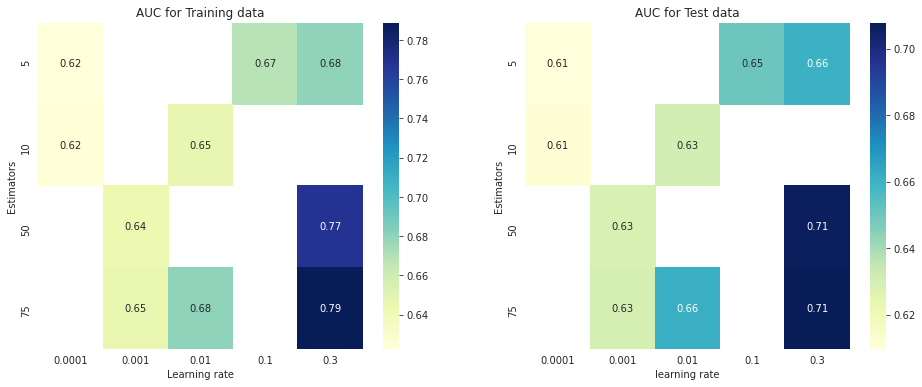

In [38]:
#Took this code from https://www.kaggle.com/arindambanerjee/grid-search-simplified
import seaborn as sns
import matplotlib.pyplot as plt

learning_rate_list = list(clf.cv_results_['param_learning_rate'].data)
estimators_list = list(clf.cv_results_['param_n_estimators'].data)

sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = pd.DataFrame(data={'Estimators':estimators_list, 'Learning rate':learning_rate_list, 'AUC':clf.cv_results_['mean_train_score']})
data = data.pivot(index='Estimators', columns='Learning rate', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Training data')
plt.subplot(1,2,2)
data = pd.DataFrame(data={'Estimators':estimators_list, 'learning rate':learning_rate_list, 'AUC':clf.cv_results_['mean_test_score']})
data = data.pivot(index='Estimators', columns='learning rate', values='AUC')
sns.heatmap(data, annot=True, cmap="YlGnBu").set_title('AUC for Test data')
plt.show()

In [39]:
clf.best_params_

{'learning_rate': 0.3, 'n_estimators': 75}

In [40]:
dtree_final= XGBClassifier(n_jobs=-1,learning_rate=0.3,n_estimators=50,tree_method='gpu_hist', gpu_id=0)
dtree_final.fit(X_tr_, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

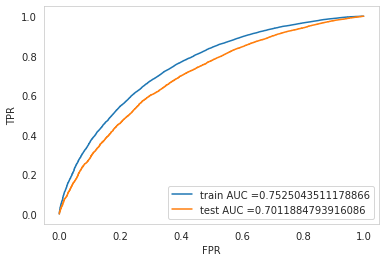

In [41]:
from sklearn.metrics import roc_curve, auc
y_train_pred = dtree_final.predict_proba(X_tr_)[:,1]
y_test_pred = dtree_final.predict_proba(X_te_)[:,1]
 
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()
b=auc(test_fpr,test_tpr)

the maximum value of tpr*(1-fpr) 0.4719287347421252 for threshold 0.845
Train confusion matrix


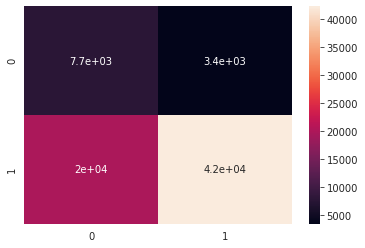

In [42]:
 
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
 
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)),annot=True)

Test confusion matrix


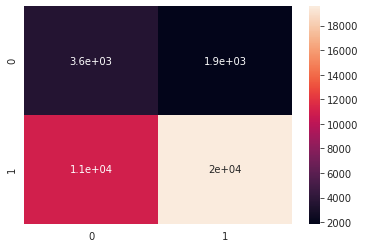

In [43]:
 
print("Test confusion matrix")
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)),annot=True)

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [44]:
 
 
#https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from tabulate import tabulate
print(tabulate([['TFIDF', "Xgboost",0.3,50,a], ['TFidf_w2v',"Xgboost",0.3,50,b]], headers=['Vectorizer', 'Model',"Hyperparameter_learning_rate","Hyperparameter_n_estimators","AUC"], tablefmt='orgtbl'))

| Vectorizer   | Model   |   Hyperparameter_learning_rate |   Hyperparameter_n_estimators |      AUC |
|--------------+---------+--------------------------------+-------------------------------+----------|
| TFIDF        | Xgboost |                            0.3 |                            50 | 0.713429 |
| TFidf_w2v    | Xgboost |                            0.3 |                            50 | 0.701188 |
